In [1]:
import matplotlib.pyplot as plt
import time
import cv2
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Grey Scale Image')

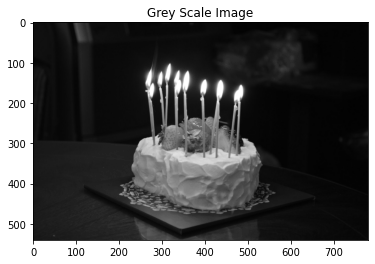

In [2]:
img = cv2.imread("img5.jpg",0)
img = cv2.resize(img, (780, 540),
interpolation = cv2.INTER_NEAREST)
plt.imshow(img,aspect="auto" ,cmap = 'gray')
plt.title("Grey Scale Image")


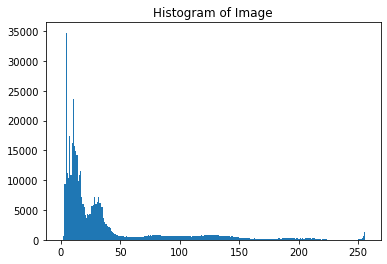

In [4]:
plt.hist(img.ravel(),256,[0,256])
plt.title("Histogram of Image")
plt.show()

**Histogram** **Equalization**

In [8]:
#apply transformation
def hisEqualization(image):
  
    olddim = image.shape
    img = image.ravel()
    value , rev_index, counts = np.unique(img,return_inverse=True,return_counts=True)
    sk = np.cumsum(counts).astype(np.float64)
    sk/=sk[-1]
    sk = np.around(sk*255)
    return sk[rev_index].reshape(olddim)

In [9]:
eqal_img = hisEqualization(img)

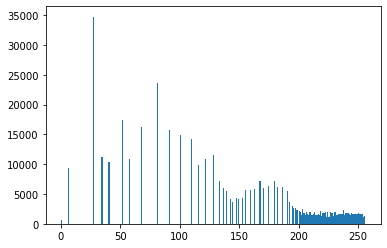

In [10]:
plt.hist(eqal_img.ravel(),256,[0,256])
plt.show()

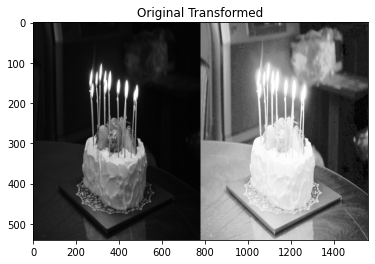

In [11]:
result = np.hstack((img,eqal_img))
plt.imshow(result,aspect="auto" ,cmap='gray')
plt.title("Original Transformed")
plt.show()
# cv2.imshow("Image",result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

 **Histogram** **Matching**

Text(0.5, 1.0, 'Target Grey Scale Image')

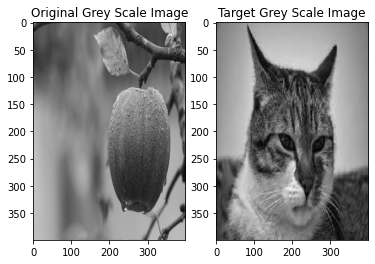

In [13]:
image = cv2.imread("img6.jpeg",0)
target = cv2.imread("img9.jpg",0)
image = cv2.resize(image, (400, 400),interpolation = cv2.INTER_NEAREST)
target = cv2.resize(target, (400, 400),interpolation = cv2.INTER_NEAREST)
# image = hisEqualization(image)
plt.subplot(1,2,1)
plt.imshow(image,aspect="auto" ,cmap ='gray')
plt.title("Original Grey Scale Image")
plt.subplot(1,2,2)
plt.imshow(target,aspect="auto",cmap='gray')
plt.title("Target Grey Scale Image")


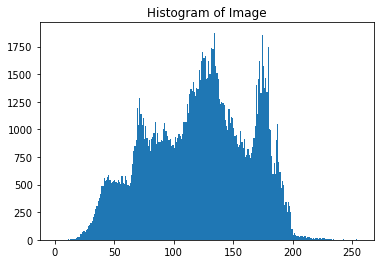

In [15]:
plt.hist(image.ravel(),256,[0,256])
plt.title("Histogram of Image")
plt.show()


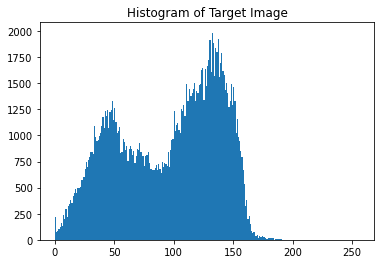

In [16]:
plt.hist(target.ravel(),256,[0,256])
plt.title("Histogram of Target Image")
plt.show()

In [22]:
def findNearestInteger(arr,target):
    diff = arr-target
    mask = np.ma.less_equal(diff,-1)
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c
    mask_arr = np.ma.masked_array(diff,mask)
    return mask_arr.argmin()


In [23]:
def hisTogramSpecification(image, target):
    sk = hisEqualization(image)
    zk = hisEqualization(target)
    shapeofImage = image.shape
    image = image.ravel()
# target = target.ravel()
    value, revIndex = np.unique(image,return_inverse=True)
    sk = sk.ravel()
    zk = zk.ravel()
    result = []
    for data in sk[:]:
        c = findNearestInteger(zk,data)
        result.append(c)
    print("I am here")
    result= np.array(result,dtype='uint8')
    return result[revIndex].reshape(shapeofImage)

In [24]:
result = hisTogramSpecification(image,target)

I am here


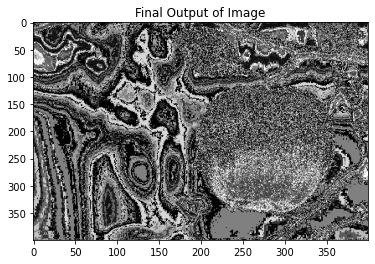

In [25]:
plt.imshow(result , cmap='gray',aspect="auto")
plt.title("Final Output of Image")
plt.show()


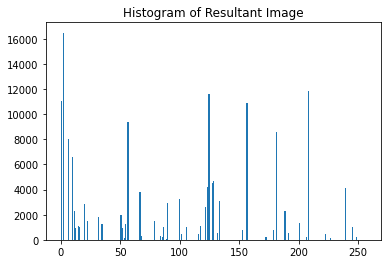

In [26]:
plt.hist(result.ravel(),256,[0,256])
plt.title("Histogram of Resultant Image")
plt.show()